Gather data

Remember: don't want to look for data to support my thesis, should let data show what it has to show, and develop a thesis off of that.
- Not the other way around

In [1]:
import pandas as pd

In [2]:
# read price data
df = pd.read_csv("price-data.csv")
df.head()

,timestamp,bitcoin,ethereum,ripple,solana,binancecoin,dogecoin,cardano,staked-ether,tron,...,render-token,bittensor,kaspa,filecoin,fetch-ai,arbitrum,virtual-protocol,gatechain-token,cosmos,ethena
0,2020-01-02 00:00:00.000,7193.754668,130.484685,0.192556,NaN,13.685902,0.002026,0.033362,NaN,0.013199,...,NaN,NaN,NaN,NaN,0.038686,NaN,NaN,0.353788,4.381528,NaN
1,2020-01-03 00:00:00.000,6963.853354,127.045258,0.187433,NaN,13.007171,0.002008,0.032618,NaN,0.012845,...,NaN,NaN,NaN,NaN,0.036687,NaN,NaN,0.343728,4.098819,NaN
2,2020-01-04 00:00:00.000,7300.346935,133.702649,0.192299,NaN,13.603276,0.002049,0.033967,NaN,0.013371,...,NaN,NaN,NaN,NaN,0.038930,NaN,NaN,0.353166,4.227682,NaN
3,2020-01-05 00:00:00.000,7351.377053,134.136883,0.192812,NaN,13.794575,0.002189,0.034298,NaN,0.013438,...,NaN,NaN,NaN,NaN,0.040255,NaN,NaN,0.354280,4.253197,NaN
4,2020-01-06 00:00:00.000,7349.972248,135.005714,0.193816,NaN,14.006361,0.002070,0.034427,NaN,0.013512,...,NaN,NaN,NaN,NaN,0.038340,NaN,NaN,0.386061,4.199192,NaN


Compute daily log returns from daily returns

In [3]:
import numpy as np

In [4]:
# set timestamp column as the index
df.set_index("timestamp", inplace=True)

# compute daily log returns from daily price data
log_returns = np.log(df / df.shift(1))
log_returns.head()

,bitcoin,ethereum,ripple,solana,binancecoin,dogecoin,cardano,staked-ether,tron,chainlink,...,render-token,bittensor,kaspa,filecoin,fetch-ai,arbitrum,virtual-protocol,gatechain-token,cosmos,ethena
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00.000,-0.032480,-0.026712,-0.026961,NaN,-0.050866,-0.008557,-0.022558,NaN,-0.027241,-0.038120,...,NaN,NaN,NaN,NaN,-0.053068,NaN,NaN,-0.028847,-0.066699,NaN
2020-01-04 00:00:00.000,0.047189,0.051075,0.025629,NaN,0.044810,0.019956,0.040541,NaN,0.040143,0.037832,...,NaN,NaN,NaN,NaN,0.059354,NaN,NaN,0.027087,0.030955,NaN
2020-01-05 00:00:00.000,0.006966,0.003242,0.002662,NaN,0.013965,0.066308,0.009696,NaN,0.004981,0.013014,...,NaN,NaN,NaN,NaN,0.033460,NaN,NaN,0.003148,0.006017,NaN
2020-01-06 00:00:00.000,-0.000191,0.006456,0.005193,NaN,0.015236,-0.055854,0.003744,NaN,0.005511,-0.017516,...,NaN,NaN,NaN,NaN,-0.048730,NaN,NaN,0.085908,-0.012779,NaN


Check for trend effects - across all coins

In [5]:
# create dataframe of the returns of the aggregate, like the returns of an index
aggregate = pd.DataFrame({"aggregate": log_returns.mean(axis=1)})
aggregate.head()

,aggregate
timestamp,
2020-01-02 00:00:00.000,NaN
2020-01-03 00:00:00.000,-0.032993
2020-01-04 00:00:00.000,0.048107
2020-01-05 00:00:00.000,0.016507
2020-01-06 00:00:00.000,0.003813


Simple Visualization of Cumulative Returns

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cumulative Log Returns')

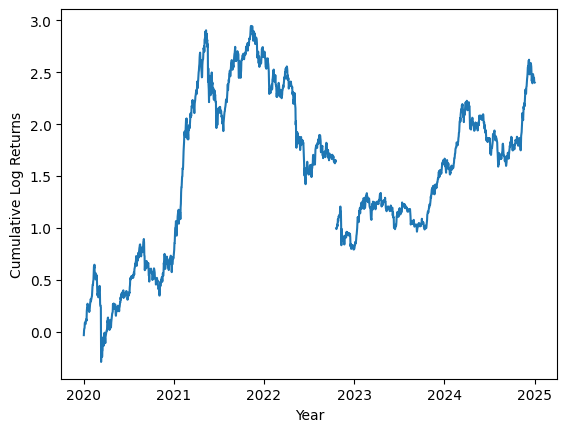

In [8]:
# plot cumulative returns
aggregate["aggregate"].cumsum().plot()

# get index of first occurence of each year
year, year_index = np.unique(pd.to_datetime(aggregate.index).year, return_index = True)
plt.xticks(year_index, year);
plt.xlabel("Year")
plt.ylabel("Cumulative Log Returns")

From this plot, we can see that trends don't tend to occur in a low volatility manner, and they don't occur often. 
- When they do, they occur in clusters of extremely large moves.
- Therefore, looking at the entire set of returns might not us the correct analysis, but we shall include it anyways.
- It'll probably be more informational to condition on large volatility, and to observe whether trends effects dominate, or they result in noise.

Visualization of Previous Period's Return (Average) against Next Period's Return (Average), Period = 5 Days

In [9]:
# set the number of days that constitute a period
n_days = 5

In [10]:
# compute average return over the past n_days
avg_prev = aggregate["aggregate"].rolling(n_days).mean()
avg_next = avg_prev.shift(-n_days)
avg_period_returns_df = pd.DataFrame({
    "avg_prev" : avg_prev, 
    "avg_next" : avg_next
})
avg_period_returns_df.head()

,avg_prev,avg_next
timestamp,,
2020-01-02 00:00:00.000,NaN,0.017001
2020-01-03 00:00:00.000,NaN,0.024437
2020-01-04 00:00:00.000,NaN,0.012280
2020-01-05 00:00:00.000,NaN,0.008338
2020-01-06 00:00:00.000,NaN,0.014268


In [11]:
# clean dataframe, remove NAs
avg_period_returns_df = avg_period_returns_df.dropna()
avg_period_returns_df.head()

,avg_prev,avg_next
timestamp,,
2020-01-07 00:00:00.000,0.017001,0.004315
2020-01-08 00:00:00.000,0.024437,0.006336
2020-01-09 00:00:00.000,0.012280,0.005903
2020-01-10 00:00:00.000,0.008338,0.025031
2020-01-11 00:00:00.000,0.014268,0.023671


Text(0, 0.5, 'Next Period Return')

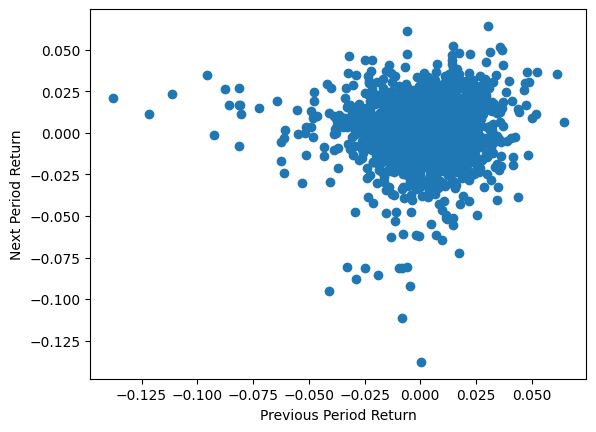

In [12]:
# plot previous period's return decile against next period's return decile
plt.scatter(avg_period_returns_df["avg_prev"], avg_period_returns_df["avg_next"])
plt.xlabel("Previous Period Return")
plt.ylabel("Next Period Return")

In [13]:
import statsmodels.api as sm

In [14]:
# run a linear regression model, regress next period returns on previous period preturns
X = sm.add_constant(avg_period_returns_df["avg_prev"]) # add intercept
y = avg_period_returns_df["avg_next"]
model = sm.OLS(y, X).fit()

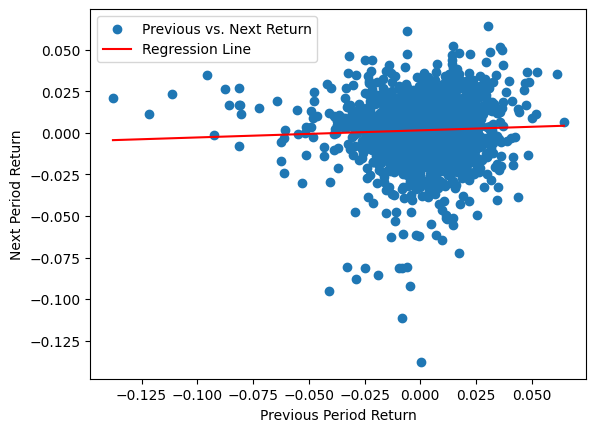

In [15]:
# plot regression model (plot predicted values)
min_of_range = avg_period_returns_df.min().min()
max_of_range = avg_period_returns_df.max().max()
return_range = np.linspace(min_of_range, max_of_range, 100) # generate range of values for a smooth regression line
next_period_pred = model.predict(sm.add_constant(return_range))

# scatter plot of previous period return vs. next period return
plt.scatter(avg_period_returns_df["avg_prev"], avg_period_returns_df["avg_next"], label = "Previous vs. Next Return")

# plot regression line
plt.plot(return_range, next_period_pred, color = "red", label = "Regression Line")

plt.xlabel("Previous Period Return")
plt.ylabel("Next Period Return")
plt.legend();

Visualization of Previous Period's Return (Average) against Next Period's Return (Average) for Different Periods e.g. 5, 10, 20, 30

In [16]:
# convert to a function, and plot each in a grid
def plot_prev_next(ax, n_days):
    # compute average return over the past n_days
    avg_prev = aggregate["aggregate"].rolling(n_days).mean()
    avg_next = avg_prev.shift(-n_days)
    avg_period_returns_df = pd.DataFrame({
        "avg_prev" : avg_prev, 
        "avg_next" : avg_next
    })

    # clean dataframe, remove NAs
    avg_period_returns_df = avg_period_returns_df.dropna()
    avg_period_returns_df.head()

    # run a linear regression model, regress next period returns on previous period preturns
    X = sm.add_constant(avg_period_returns_df["avg_prev"]) # add intercept
    y = avg_period_returns_df["avg_next"]
    model = sm.OLS(y, X).fit()

    # plot regression model (plot predicted values)
    min_of_range = avg_period_returns_df.min().min()
    max_of_range = avg_period_returns_df.max().max()
    return_range = np.linspace(min_of_range, max_of_range, 100) # generate range of values for a smooth regression line
    next_period_pred = model.predict(sm.add_constant(return_range))

    # scatter plot of previous period return vs. next period return
    ax.scatter(avg_period_returns_df["avg_prev"], avg_period_returns_df["avg_next"], label = f'Fit Line (R² = {model.rsquared:.2f})')

    # plot regression line
    ax.plot(return_range, next_period_pred, color = "red", label = f"{model.params.iloc[1]:.3f}")
    
    ax.set_title(f"Period = {n_days} days")
    ax.set_xlabel(f"Previous Period Return")
    ax.set_ylabel(f"Next Period Return")
    ax.legend()

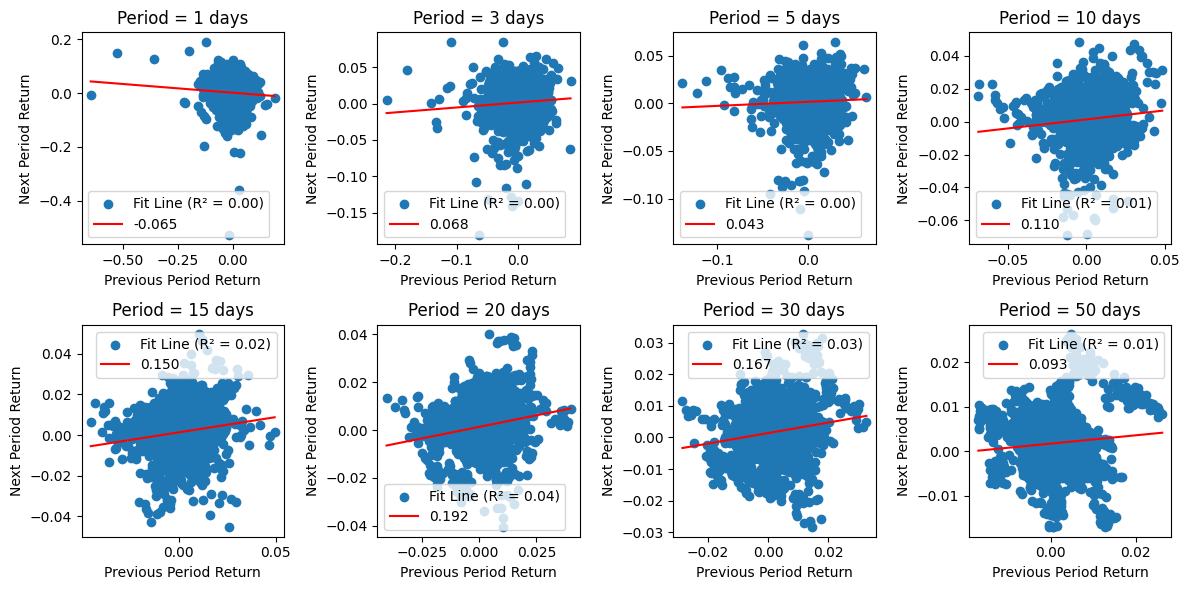

In [17]:
n_days_list = [1, 3, 5, 10, 15, 20, 30, 50]
n_rows = 2
n_cols = np.ceil(len(n_days_list) / 2).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(len(n_days_list)):
    plot_prev_next(axes[i], n_days = n_days_list[i])

plt.tight_layout()

Statistical Tests

Autocorrelation Function (ACF) - not a statistical test, but statistical tool

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Autocorrelation of Log Returns')

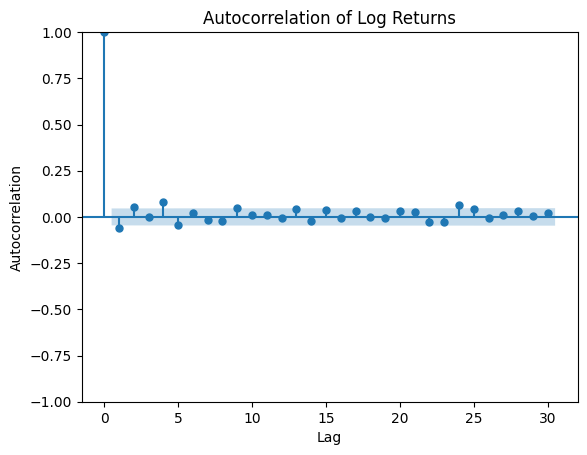

In [28]:
plot_acf(aggregate.dropna()["aggregate"], lags = 30)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Log Returns")

The ACF plot gives you individual lag correlations, but it does not test whether all the lags combined show evidence of non-randomness.
- The Ljung-Box test evaluates whether the autocorrelations across multiple lags are jointly significantly different from zero, which is a more holistic view of the time series

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [31]:
# test if joint autocorrelations are random or not
ljung_box = acorr_ljungbox(aggregate["aggregate"].dropna(), lags = 50)
ljung_box

,lb_stat,lb_pvalue
1,7.066686,0.007853
2,11.868386,0.002647
3,11.871352,0.007837
4,23.322877,0.000109
5,26.751905,0.000064
6,27.437142,0.000120
7,28.082510,0.000212
8,28.936336,0.000325
9,33.442490,0.000112
10,33.724718,0.000206


The AutoReg (AR) model is essentially modeling how past returns can predict future returns. 
- In an AR model, you model the current value $r_t$ as a linear combination of previous values $r_{t-1}, r_{t-2}, ...$
- The presence of momentum would show that the lagged returns are significantly predictive of future returns
- check if the coefficients on lagged returns are significant, if they are significant, this suggests that past returns (momentum) have a relationship with future returns

In [47]:
from statsmodels.tsa.ar_model import AutoReg

In [88]:
model = AutoReg(aggregate["aggregate"].dropna(), lags = 30)  # AR model with 10 lags
model.fit().summary()

c:\Users\steph\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              aggregate   No. Observations:                 1826
Model:                    AutoReg(30)   Log Likelihood                3104.076
Method:               Conditional MLE   S.D. of innovations              0.043
Date:                Thu, 06 Mar 2025   AIC                          -6144.152
Time:                        20:13:33   BIC                          -5968.366
Sample:                    02-02-2020   HQIC                         -6079.256
                         - 01-01-2025                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.001      0.797      0.425      -0.001       0.003
aggregate.L1     -0.0579      0.024     -2.455      0.014      -0.104      -0.012
aggregate.L2      0.0479      0.024      2.026      0.043       0.002       0.094
aggregate.L3      0.0104      0.024      0.441      0.659      -0.036       0.057
aggregate.L4      0.0715      0.024      3.025      0.002       0.025       0.118
aggregate.L5     -0.0363      0.024     -1.530      0.126      -0.083       0.010
aggregate.L6      0.0062      0.024      0.263      0.793      -0.040       0.053
aggregate.L7     -0.0230      0.024     -0.971      0.331      -0.069       0.023
aggregate.L8     -0.0293      0.024     -1.239      0.216      -0.076       0.017
aggregate.L9      0.0528      0.024      2.230      0.026       0.006       0.099
aggregate.L10     0.0198      0.024      0.838      0.402      -0.027       0.066
aggregate.L11     0.0026      0.024      0.108      0.914      -0.044       0.049
aggregate.L12    -0.0059      0.024     -0.248      0.804      -0.052       0.041
aggregate.L13     0.0294      0.024      1.241      0.215      -0.017       0.076
aggregate.L14    -0.0148      0.024     -0.626      0.531      -0.061       0.032
aggregate.L15     0.0231      0.024      0.972      0.331      -0.023       0.070
aggregate.L16    -0.0005      0.024     -0.020      0.984      -0.047       0.046
aggregate.L17     0.0262      0.024      1.104      0.270      -0.020       0.073
aggregate.L18     0.0038      0.024      0.162      0.871      -0.043       0.050
aggregate.L19    -0.0127      0.024     -0.536      0.592      -0.059       0.034
aggregate.L20     0.0370      0.024      1.564      0.118      -0.009       0.083
aggregate.L21     0.0222      0.024      0.937      0.349      -0.024       0.069
aggregate.L22    -0.0329      0.024     -1.388      0.165      -0.079       0.014
aggregate.L23    -0.0293      0.024     -1.235      0.217      -0.076       0.017
aggregate.L24     0.0561      0.024      2.359      0.018       0.009       0.103
aggregate.L25     0.0531      0.024      2.229      0.026       0.006       0.100
aggregate.L26    -0.0059      0.024     -0.248      0.804      -0.053       0.041
aggregate.L27     0.0104      0.024      0.438      0.661      -0.036       0.057
aggregate.L28     0.0244      0.024      1.028      0.304      -0.022       0.071
aggregate.L29     0.0045      0.024      0.191      0.849      -0.042       0.051
aggregate.L30     0.0154      0.024      0.652      0.515      -0.031       0.062
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1504           -0.0000j            1.1504           -0.5000
AR.2            -1.0892           -0.2398j            1.11

In terms, of testing for the presence of trends, we get mixed, and poor results.
- If there is a presence of trends, it is a very, very, very weak effect, and harnessing it, if it does exist, is incredibly noisy, and doesn't lead to that much higher excess returns over time, and empirically this has been so.
- Firms specializing in trend-following, momentum have return profile that is incredibly unattractive to insitutional investors, high-net worth clients that have other, better return streams available to them.
- Their returns are characterized by their incredible sporadicness, which basically leads to incredibly long drawdowns for extended periods of time, however at the same time, clients love it for diversification purposes, uncorrelated to most other return streams, and it's positive skew.
- Essentially, there are no "bad surprises, wake-up calls at 1am" when it comes to trend-following.

T-test of returns during trend-periods
- conduct t-test of returns during trend periods, to test whether they are significantly different from returns otherwise
- essentially, if the null hypothesis were true, the returns would oscillate around the mean, so up-trend periods would net out against down-trend periods.
- however if the difference is large, this suggests trends effects are present.

In [55]:
from scipy import stats

In [59]:
# define trend-period, kind of arbitrary, depends on desired timeframe, e.g. short-term momentum vs long-term

# set up moving averages
aggregate.dropna(inplace = True)
aggregate['ma_1'] = aggregate['aggregate'].ewm(span=15, adjust = False).mean()
aggregate['ma_2'] = aggregate['aggregate'].ewm(span=30, adjust = False).mean()

# define trend periods
aggregate['is_trend'] = aggregate['ma_1'] > aggregate['ma_2']

# perform t-test between trend-returns, and non-trend returns
trend_returns = aggregate[aggregate["is_trend"] == True]["aggregate"]
non_trend_returns = aggregate[aggregate["is_trend"] == False]["aggregate"]

t_stat, p_value = stats.ttest_ind(trend_returns, non_trend_returns)
t_stat, p_value

(np.float64(15.934055427047472), np.float64(1.2830860571424845e-53))

Check for trend effects - bitcoin

In [22]:
# create dataframe of just bitcoin
bitcoin = pd.DataFrame(log_returns["bitcoin"])
bitcoin.head()

,bitcoin
timestamp,
2020-01-02 00:00:00.000,NaN
2020-01-03 00:00:00.000,-0.032480
2020-01-04 00:00:00.000,0.047189
2020-01-05 00:00:00.000,0.006966
2020-01-06 00:00:00.000,-0.000191


Simple Visualization of Cumulative Returns

Text(0, 0.5, 'Cumulative Log Return')

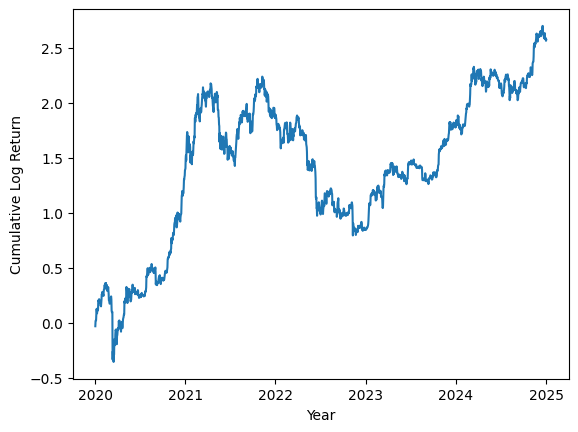

In [24]:
# plot cumulative returns
bitcoin["bitcoin"].cumsum().plot()
# get index of first occurence of each year
year, year_index = np.unique(pd.to_datetime(bitcoin.index).year, return_index = True)
plt.xticks(year_index, year);
plt.xlabel("Year")
plt.ylabel("Cumulative Log Return")

Visualization of Previous Period's Return against Next Period's Return for various periods

In [25]:
# convert to a function, and plot each in a grid
def plot_prev_next(ax, n_days):
    # compute average return over the past n_days
    avg_prev = bitcoin["bitcoin"].rolling(n_days).mean()
    avg_next = avg_prev.shift(-n_days)
    avg_period_returns_df = pd.DataFrame({
        "avg_prev" : avg_prev, 
        "avg_next" : avg_next
    })

    # clean dataframe, remove NAs
    avg_period_returns_df = avg_period_returns_df.dropna()
    avg_period_returns_df.head()

    # run a linear regression model, regress next period returns on previous period preturns
    X = sm.add_constant(avg_period_returns_df["avg_prev"]) # add intercept
    y = avg_period_returns_df["avg_next"]
    model = sm.OLS(y, X).fit()

    # plot regression model (plot predicted values)
    min_of_range = avg_period_returns_df.min().min()
    max_of_range = avg_period_returns_df.max().max()
    return_range = np.linspace(min_of_range, max_of_range, 100) # generate range of values for a smooth regression line
    next_period_pred = model.predict(sm.add_constant(return_range))

    # scatter plot of previous period return vs. next period return
    ax.scatter(avg_period_returns_df["avg_prev"], avg_period_returns_df["avg_next"], label = f'Fit Line (R² = {model.rsquared:.2f})')

    # plot regression line
    ax.plot(return_range, next_period_pred, color = "red", label = f"{model.params.iloc[1]:.3f}")
    
    ax.set_title(f"Period = {n_days} days")
    ax.set_xlabel(f"Previous Period Return")
    ax.set_ylabel(f"Next Period Return")
    ax.legend()

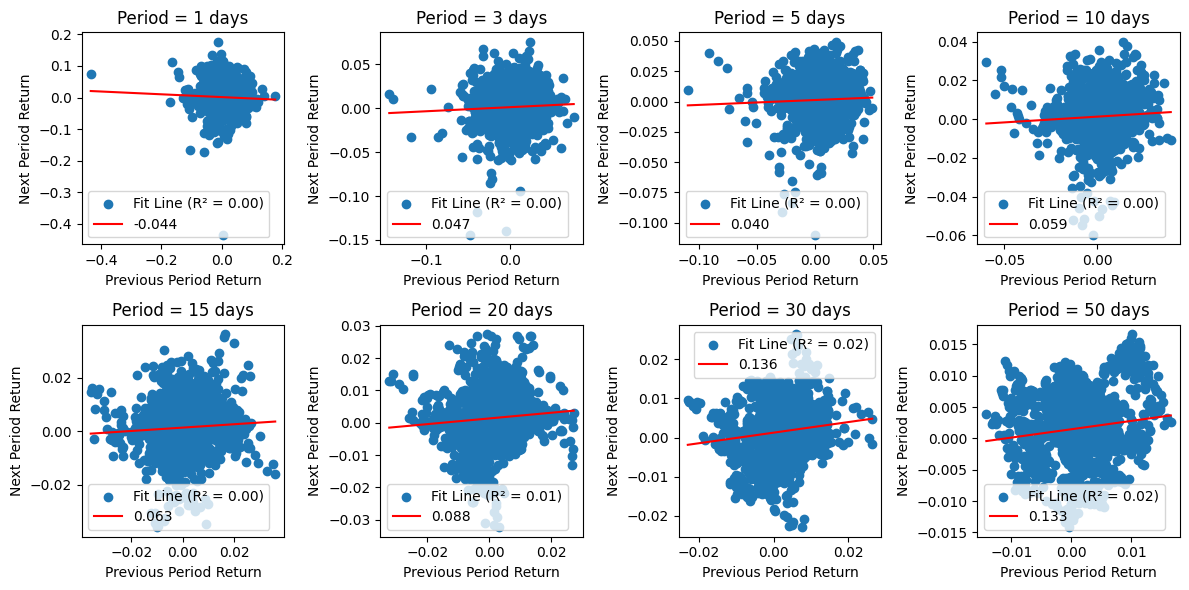

In [26]:
n_days_list = [1, 3, 5, 10, 15, 20, 30, 50]
n_rows = 2
n_cols = np.ceil(len(n_days_list) / 2).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(len(n_days_list)):
    plot_prev_next(axes[i], n_days = n_days_list[i])

plt.tight_layout()

There does seem to be a trend effect, but it is incredibly weak. (as it is in the rest of trad-fi assets)
- It's a very weak edge, if we can even call it an "edge".

Statistical Test of Validity (and Analysis)

Autocorrelation Function of Returns

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0, 0.5, 'Autocorrelation')

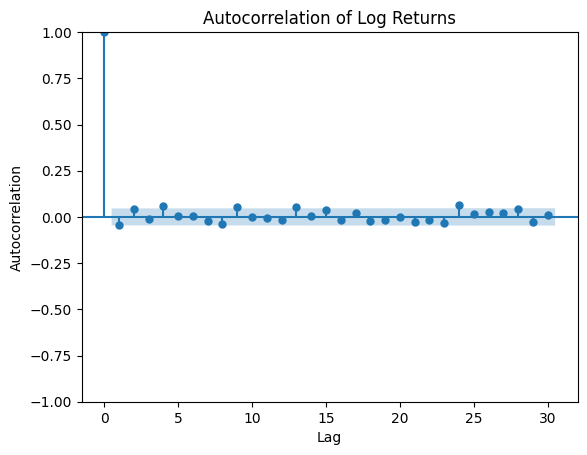

In [27]:
# autocorrelation function
plot_acf(bitcoin.dropna()["bitcoin"], lags = 30)  # Autocorrelation up to 10 lags
plt.title("Autocorrelation of Log Returns");
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

Just from looking at the ACF plot, returns seem to be largely uncorrelated over time.
- Behaves like a random walk

Statistical Test of Validity

More rigorous test, rather than viewing the ACF, which only plots the correlation at each lag individually
- The Ljung-Box test, considers the correlations as a group, where even though the individual correlations may be small, the combined effect of the correlations suggest that the returns might not be entirely random.
- Test evaluates whether the correlation across multiple lags are (jointly) significantly different from zero.

- It also can detect non-linear dependence in the data, heteroskedasticity, infrequent massive autocorrelated jumps (vol clustering)


In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [43]:
# ljung-box test (auto-correlation based test), tests whether autocorrelation at multiple lags are jointly significant
# if the p-value is low, may suggest returns are not purely random and exhibit a trend component
acorr_ljungbox(bitcoin.dropna()["bitcoin"], lags=50)

,lb_stat,lb_pvalue
1,3.583032,0.058373
2,7.049371,0.029461
3,7.256168,0.064166
4,13.772151,0.008059
5,13.815735,0.016823
6,13.874473,0.031070
7,14.921955,0.037013
8,17.685514,0.023712
9,22.896604,0.006433
10,22.897819,0.011130


In [45]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model = AutoReg(bitcoin["bitcoin"].dropna(), lags = 30)  # AR model with 30 lags
model.fit().summary()

c:\Users\steph\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1825
Model:                    AutoReg(30)   Log Likelihood                3558.193
Method:               Conditional MLE   S.D. of innovations              0.033
Date:                Tue, 11 Mar 2025   AIC                          -7052.386
Time:                        18:40:31   BIC                          -6876.618
Sample:                            30   HQIC                         -6987.494
                                 1825                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0011      0.001      1.370      0.171      -0.000       0.003
bitcoin.L1     -0.0430      0.024     -1.820      0.069      -0.089       0.003
bitcoin.L2      0.0394      0.024      1.668      0.095      -0.007       0.086
bitcoin.L3     -0.0029      0.024     -0.121      0.904      -0.049       0.043
bitcoin.L4      0.0545      0.024      2.312      0.021       0.008       0.101
bitcoin.L5      0.0204      0.024      0.862      0.388      -0.026       0.067
bitcoin.L6      0.0093      0.024      0.396      0.692      -0.037       0.056
bitcoin.L7     -0.0286      0.024     -1.214      0.225      -0.075       0.018
bitcoin.L8     -0.0413      0.024     -1.750      0.080      -0.087       0.005
bitcoin.L9      0.0530      0.024      2.249      0.025       0.007       0.099
bitcoin.L10     0.0060      0.024      0.255      0.799      -0.040       0.052
bitcoin.L11    -0.0198      0.024     -0.840      0.401      -0.066       0.026
bitcoin.L12    -0.0077      0.024     -0.325      0.745      -0.054       0.039
bitcoin.L13     0.0445      0.024      1.886      0.059      -0.002       0.091
bitcoin.L14     0.0068      0.024      0.288      0.773      -0.040       0.053
bitcoin.L15     0.0263      0.024      1.114      0.265      -0.020       0.073
bitcoin.L16    -0.0074      0.024     -0.315      0.753      -0.054       0.039
bitcoin.L17     0.0202      0.024      0.856      0.392      -0.026       0.067
bitcoin.L18    -0.0249      0.024     -1.057      0.291      -0.071       0.021
bitcoin.L19    -0.0263      0.024     -1.117      0.264      -0.073       0.020
bitcoin.L20     0.0027      0.024      0.113      0.910      -0.044       0.049
bitcoin.L21    -0.0243      0.024     -1.031      0.303      -0.071       0.022
bitcoin.L22    -0.0271      0.024     -1.151      0.250      -0.073       0.019
bitcoin.L23    -0.0316      0.024     -1.340      0.180      -0.078       0.015
bitcoin.L24     0.0588      0.024      2.494      0.013       0.013       0.105
bitcoin.L25     0.0308      0.024      1.305      0.192      -0.015       0.077
bitcoin.L26     0.0214      0.024      0.905      0.365      -0.025       0.068
bitcoin.L27     0.0275      0.024      1.167      0.243      -0.019       0.074
bitcoin.L28     0.0345      0.024      1.462      0.144      -0.012       0.081
bitcoin.L29    -0.0302      0.024     -1.284      0.199      -0.076       0.016
bitcoin.L30    -0.0022      0.024     -0.092      0.926      -0.048       0.044
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0985           -0.0000j            1.0985           -0.5000
AR.2            -1.0463           -0.2530j            1.0764           -0.4622
AR.3            -1.0463           +0.2530j     